# Processamento Digital de Imagens - AP1

## Parte II - Prática

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Q6
Apresente o código que utiliza exclusivamente `numpy` e gera a imagem $100\times 100$ `q1.png`.

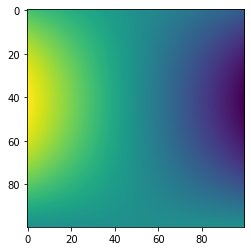

In [72]:
def q1 (n=100):

    # START CODE HERE
    # return np.full((n, n, 3), 0) 
    # x, y = np.meshgrid(np.linspace(0, 1), np.linspace(0, 1))
  
    u = np.linspace(-2, 2, n)
    v = np.linspace(2, 1.5*np.pi, n)
    u, v = np.meshgrid(u, v)
    x = u * np.cos(v)
    return x

    # x = np.linspace(0, 1, n)
    # image = np.tile(x, (n, 1)).T
    # return np.dot(x[...,:3], [0.299, 0.587, 0.114])
    # END CODE HERE

img = q1()
plt.imshow(img)
plt.show()


### Q7
A Entropia de um array é dada por
$
H = - \sum_{i=0}^{L} p_{i} \log p_{i}
$
onde
$
p_{i} = \dfrac{n_{i}}{n}
$
e $n_{i}$ é a quantidade de pixels que possuem intensidade $i$, $i=0,\ldots,L$ e $n$ é o número total de pixels na imagem. O logaritmo é na base 2.
1. Calcule as entropias das imagens `q2a.png` e `q2b.png` utilizando **exclusivamente** `numpy`.
1. Compare os dois resultados e explique o que pode justificar a diferença entre eles.

Entropy q1a: 1.00
Entropy q1b: 1.00


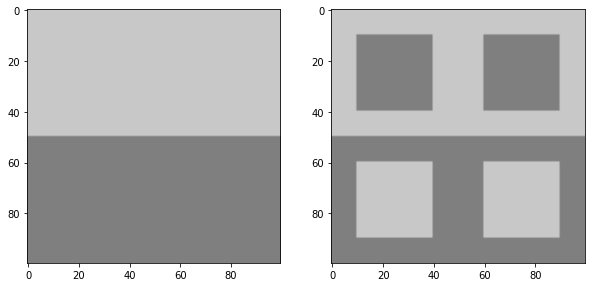

In [18]:
q1a = cv2.imread('q1a.png', cv2.IMREAD_GRAYSCALE)
q1b = cv2.imread('q1b.png', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(q1a, vmin=0, vmax=255, cmap='gray')
plt.subplot(122), plt.imshow(q1b, vmin=0, vmax=255, cmap='gray')

def entropy(img):
    
    ### START CODE HERE
    histogram, bins = np.histogram(img.ravel(), bins=256)
    e = 1e-8 # para evitar divisão por zero (1e-8 = 0.00000001)
    histogram = (histogram + e) / img.size
    return -np.sum(histogram * np.log2(histogram))
    ### END CODE HERE

# Testando sua resposta
entropy_q1a = entropy(q1a)
entropy_q1b = entropy(q1b)

print(f'Entropy q1a: {entropy_q1a:.2f}')
print(f'Entropy q1b: {entropy_q1b:.2f}')


### Q8
Aplique uma transformação que melhore a visualização da imagem `aerial.tif` para que seja alcançado um resultado similar à imagem `dst.png`.

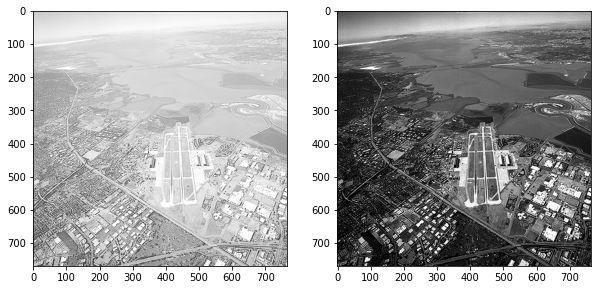

In [24]:
src = cv2.imread('aerial.tif', cv2.IMREAD_GRAYSCALE)

def melhora_visualizacao(src):
    
    ### START CODE HERE
    # Olhando os slides verifiquei que é relacionado a correção de gamma
    # https://lindevs.com/apply-gamma-correction-to-an-image-using-opencv
    gammaMatrix = np.arange(0.1, 3.0, 0.1)
    for gamma in gammaMatrix:
      varGamma = 0.5 / gamma
      table = (np.array([((i / 255.0) ** varGamma) * 255
                        for i in np.arange(0, 256)]).astype("uint8"))
      return cv2.LUT(src, table)
    ### END CODE HERE


dst = melhora_visualizacao(src)

cv2.imwrite('dst.png', dst)

plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(src, cmap='gray')
plt.subplot(122), plt.imshow(dst, cmap='gray')
plt.show()
